In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import axes3d

In [216]:
data = pd.read_csv('cdc_wonder_age_gender_cod113.txt', sep="\t")
data = data[data.Deaths >=20] # Filter due to CDC guidelines
data = data[data['Single-Year Ages Code'] != 'NS']
data = data[data.Population != 'Not Applicable']

data['COD'] = data['ICD-10 113 Cause List'].str[0:50]
data['Age'] = data['Single-Year Ages Code'].astype(int)
data['Population'] = data['Population'].astype(float)
data['Deaths'] = data['Deaths'].astype(float)
data['Deaths per 100k'] = data['Deaths'] /  data['Population'] * 100000
data = data.sort_values(by='Deaths per 100k')

In [217]:
def plotBarCOD(cod, metric):
    
    fig = plt.figure(constrained_layout=True, figsize=(15,20))
    gs = fig.add_gridspec(1,1)  
    
    ax = fig.add_subplot(gs[0,0])
    ax.set_title(cod.name + ' by ' + metric.name) 
    ax.barh(cod,metric)
    plt.show()

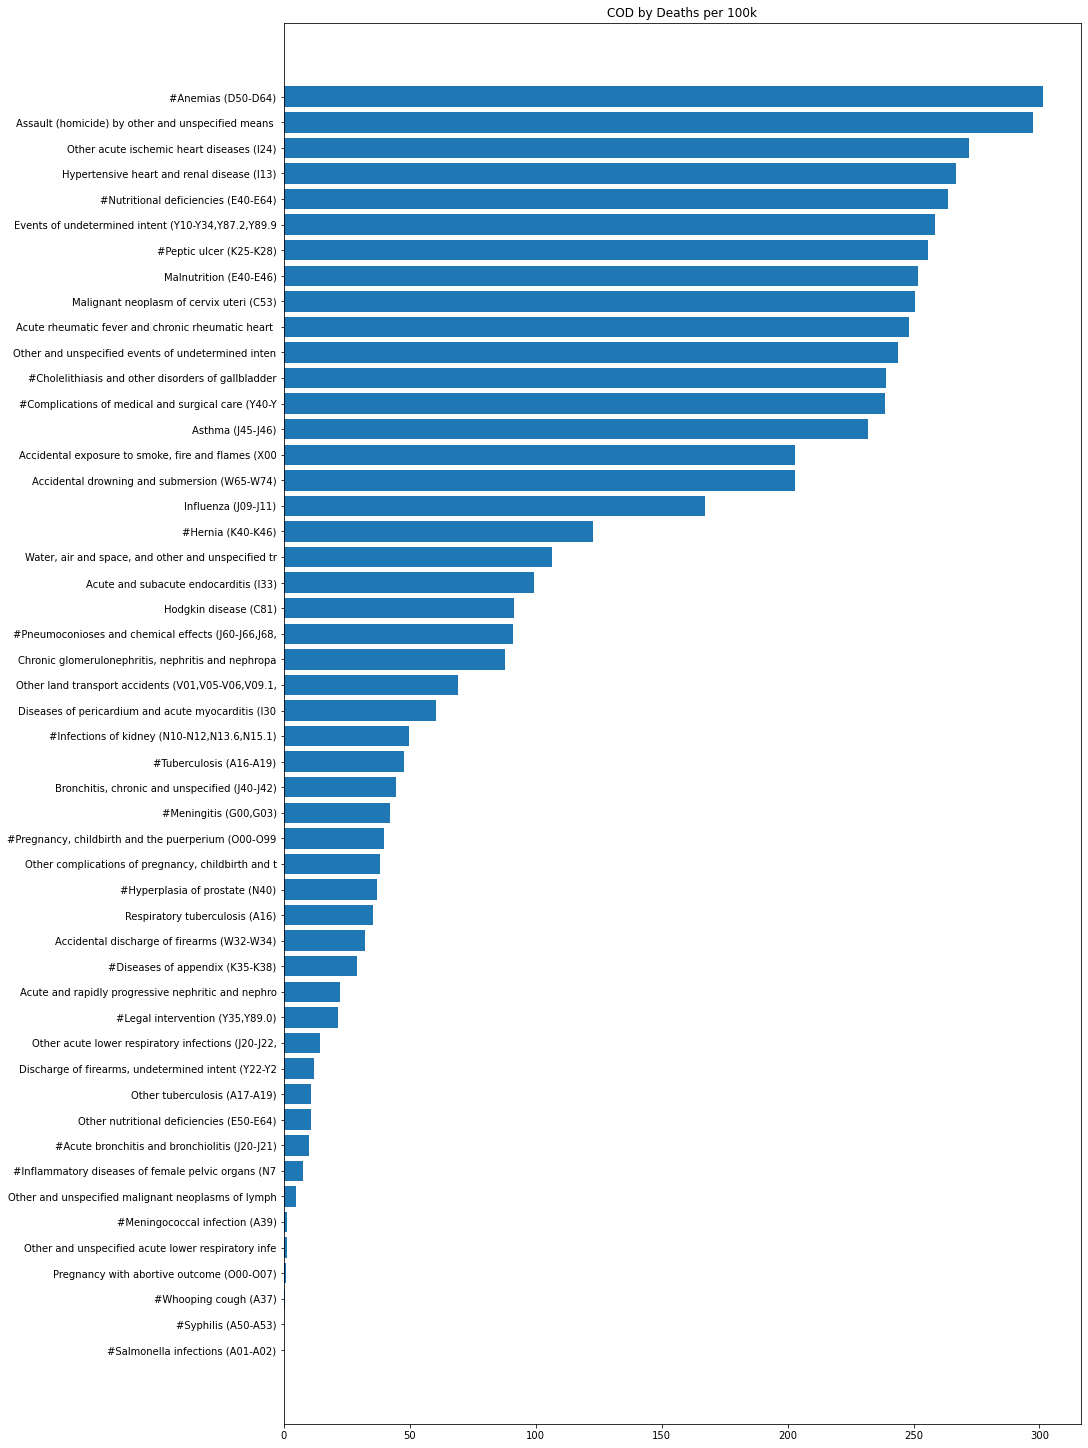

In [218]:
df = data
df = df.groupby(['COD'])['Deaths per 100k'].sum().reset_index().sort_values(by='Deaths per 100k')
df = df.head(50)
plotBarCOD(df['COD'], df['Deaths per 100k'])

In [305]:
def plotCOD(data, age_low, age_high, cod_list, age, metric, label, top_n=10):
    
    # Age filter
    data = data[(data['Age'] >= age_low) & (data['Age']<= age_high) ]
    
    # Generate list of top deaths
    df = data
    df = df.groupby(['COD', 'ICD-10 113 Cause List Code'])['Deaths per 100k'].sum().reset_index().sort_values(by='Deaths per 100k', ascending=False)
    df = df.head(top_n)
    cod_list, cod_name_list = list(df['ICD-10 113 Cause List Code']), list(df['COD'])
   

    # Plot
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    ax = fig.add_subplot(111)
    # Loop through each line
    legend_lines = []
    i = 0
    for cod_code, cod_name in zip(cod_list, cod_name_list):
        df = data
        
        df = df[df['ICD-10 113 Cause List Code']==cod_code]
        df = df.groupby(['COD', 'ICD-10 113 Cause List Code','Age']).agg({'Population':'sum', 'Deaths':'sum'}).reset_index()
        df['Deaths per 100k'] = df['Deaths'] / df['Population'] * 100000
        ax.plot(df[age], df[metric], color='C'+str(i))
        legend_line = mlines.Line2D([],[], color='C'+str(i), label=cod_name)
        legend_lines.append(legend_line)
        i+=1
        
    plt.legend(handles=legend_lines, loc='upper left', fancybox=True, framealpha=0.1)
    plt.show()

In [295]:
# Build COD List
df = data
df = df.groupby(['COD', 'ICD-10 113 Cause List Code'])['Deaths per 100k'].sum().reset_index().sort_values(by='Deaths per 100k', ascending=False)
df = df.head(30)
cod_list, cod_name_list = list(df['ICD-10 113 Cause List Code']), list(df['COD'])

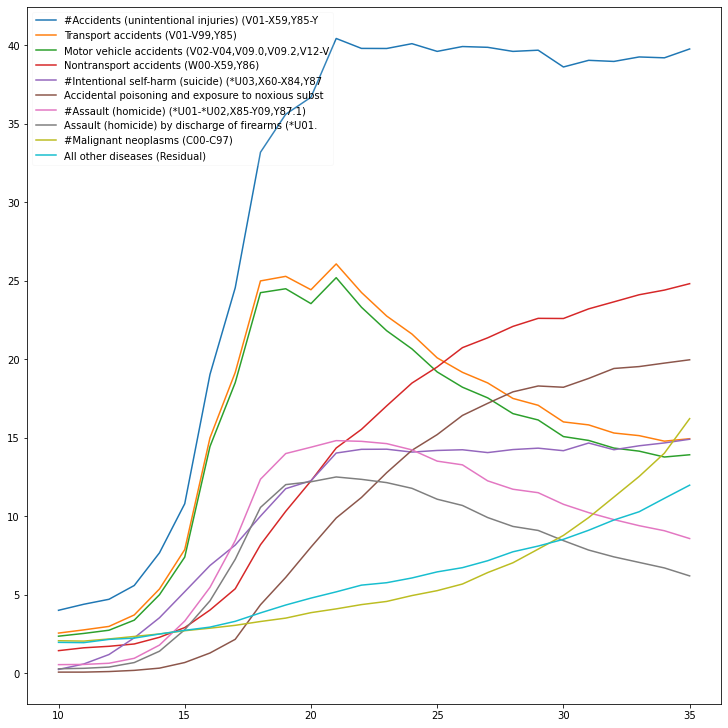

In [315]:
plotCOD(data, 10, 35, cod_list, 'Age', 'Deaths per 100k', 'COD', top_n=10)